In [2]:
import tensorflow as tf
import numpy as np

In [3]:
# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [4]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [5]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3495787 ]
 [0.5264076 ]
 [0.65786314]
 [0.74338144]
 [0.788827  ]
 [0.8022073 ]]


In [7]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.7912071]]
[[0.13882202]]


In [8]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.46567689]
 [0.         0.84158534]
 [0.         0.69936495]
 [0.         0.24653426]
 [0.         0.66962343]
 [0.         0.83667793]
 [0.         0.34365394]
 [0.         0.09529412]
 [0.         0.21820448]
 [0.         0.81843304]
 [0.         0.65574531]
 [0.         0.07641501]
 [0.         0.78145247]
 [0.         0.66000605]
 [0.         0.99245126]
 [0.         0.88901471]
 [0.         0.42037093]
 [0.         0.6358847 ]
 [0.         0.80034558]
 [0.         0.6620595 ]
 [0.         0.36448852]
 [0.         0.0146234 ]
 [0.         0.89012541]
 [0.         0.24552949]
 [0.         0.79616374]
 [0.         0.36033974]
 [0.         0.39802097]
 [0.         0.60450572]
 [0.         0.53244548]
 [0.         0.39785162]
 [0.         0.56928637]
 [0.         0.15156371]
 [0.         0.16779198]
 [0.         0.88984759]
 [0.         0.42102233]
 [0.         0.91127513]
 [0.         0.47919177]
 [0.         0.18959286]
 [0.         0.9806504 ]
 [0.         0.70155338]


In [9]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.0701 - val_loss: 0.0508
Epoch 2/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0488 - val_loss: 0.0496
Epoch 3/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0469 - val_loss: 0.0493
Epoch 4/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0512 - val_loss: 0.0487
Epoch 5/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0473 - val_loss: 0.0486
Epoch 6/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0479 - val_loss: 0.0487
Epoch 7/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0475 - val_loss: 0.0485
Epoch 8/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0470 - val_loss: 0.0511
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0485 - val_loss: 0.0521
Epoch 1

Epoch 78/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0352 - val_loss: 0.0594
Epoch 79/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0354 - val_loss: 0.0577
Epoch 80/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0342 - val_loss: 0.0619
Epoch 81/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0346 - val_loss: 0.0600
Epoch 82/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0343 - val_loss: 0.0647
Epoch 83/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0345 - val_loss: 0.0597
Epoch 84/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0332 - val_loss: 0.0605
Epoch 85/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0328 - val_loss: 0.0618
Epoch 86/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0331 - val_loss: 0.0632
Epoch 87/100
2048/2048 [======================

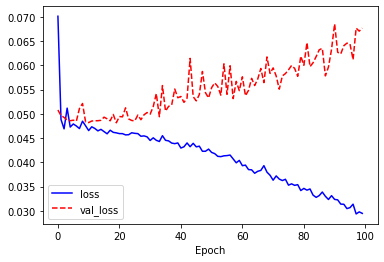

In [12]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.24063509116083537 	 0.42730445 	diff: 0.18666935553639974
0.026515383796123372 	 0.40212587 	diff: 0.37561048142490017
0.027100423012126576 	 0.29355055 	diff: 0.266450127925526
0.11589036024179875 	 0.28220505 	diff: 0.16631468498143734
0.36309363378480697 	 0.19267161 	diff: 0.170422021879709
correctness: 9.318181818181818 %


In [14]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 26s 13ms/sample - loss: 0.0518 - val_loss: 0.0484
Epoch 2/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0464 - val_loss: 0.0481
Epoch 3/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0464 - val_loss: 0.0480
Epoch 4/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0465 - val_loss: 0.0483
Epoch 5/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0465 - val_loss: 0.0482
Epoch 6/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0463 - val_loss: 0.0492
Epoch 7/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0463 - val_loss: 0.0480
Epoch 8/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0467 - val_loss: 0.0486
Epoch 9/100
2048/2048 [==============================] - 16s 8ms/sample - loss: 0.0463 - val_loss: 0.049

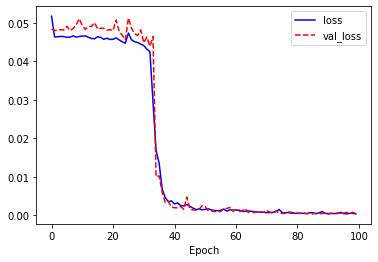

In [16]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.24063509116083537 	 0.24228548 	diff: 0.0016503839740141801
0.026515383796123372 	 0.01775013 	diff: 0.008765254692462789
0.027100423012126576 	 0.030017622 	diff: 0.0029171988030780444
0.11589036024179875 	 0.0982125 	diff: 0.01767785734501301
0.36309363378480697 	 0.35709953 	diff: 0.005994100703752281
correctness: 96.36363636363636 %


In [18]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.5543e-04 - val_loss: 1.2588e-04
Epoch 2/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.4853e-04 - val_loss: 1.1700e-04
Epoch 3/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.4389e-04 - val_loss: 1.8223e-04
Epoch 4/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.4472e-04 - val_loss: 1.1619e-04
Epoch 5/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.4046e-04 - val_loss: 2.6864e-04
Epoch 6/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.4496e-04 - val_loss: 1.1037e-04
Epoch 7/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.1760e-04 - val_loss: 1.7231e-04
Epoch 8/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 1.2788e-04 - val_loss: 1.2792e-04
Epoch 9/100
2048/2048 [==================

Epoch 72/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 4.8860e-05 - val_loss: 5.7056e-05
Epoch 73/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 4.5399e-05 - val_loss: 7.0985e-05
Epoch 74/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 6.0032e-05 - val_loss: 6.8310e-05
Epoch 75/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 6.5779e-05 - val_loss: 8.5351e-05
Epoch 76/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 5.8391e-05 - val_loss: 7.5951e-05
Epoch 77/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 6.5748e-05 - val_loss: 1.2399e-04
Epoch 78/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 4.8569e-05 - val_loss: 9.0847e-05
Epoch 79/100
2048/2048 [==============================] - 12s 6ms/sample - loss: 5.2923e-05 - val_loss: 7.6379e-05
Epoch 80/100
2048/2048 [==============================] - 12s 6ms/sample - loss:

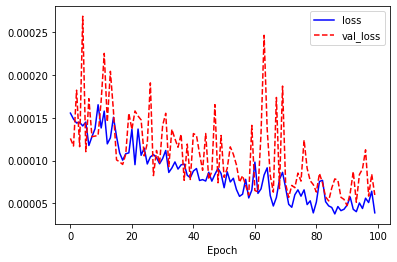

In [23]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [24]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.24063509116083537 	 0.23908082 	diff: 0.0015542746534958907
0.026515383796123372 	 0.020210147 	diff: 0.006305236892131673
0.027100423012126576 	 0.027117208 	diff: 1.6784634243358076e-05
0.11589036024179875 	 0.111892946 	diff: 0.003997414177326547
0.36309363378480697 	 0.36296794 	diff: 0.0001256956000688092
correctness: 100.0 %


In [25]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 1s 0us/step


In [26]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [27]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [28]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


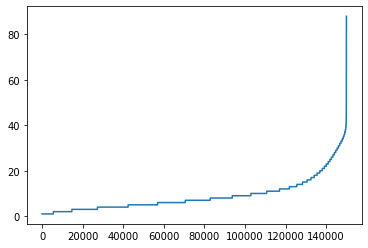

142587


In [29]:
# 7.23 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [30]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [31]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [32]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [33]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
 18688/120000 [===>..........................] - ETA: 7:06 - loss: 0.5535 - accuracy: 0.6855

In [ ]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
# 7.31 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])